In [1]:
#proposal idea:
#Title: The Relationship between Fine Fuel Moisture, Build-up Index, and the presence of Wildfire in the Sidi Bel-abbes region of northwest Algeria
#Introduction:
#There are several contributing factors that lead to the presence of forest fires, and in this project, we will classifying whether a wildfire can happen under specified fine fuel moisture and build-up index values. 
    #Fine Fuel moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy
    #The Build-Up index (BUI) is a numeric rating of the total amount of fuel available for combustion.
#The dataset we are using includes 9 columns classifiers (of which we chose two), as well as date and time classifiers and class labels.
    #For the class labels, there are two options: fire or not fire. 
#In this classification project, we will create a model that will be able to classify the values of our two variables into whether we should expect a fire or not.
#Our exploratory table shows how many of each class (fire or no fire) there is, so we are able to visualize the distribution of our classes, and know we have enough data from both class to use in our analysis.
#We will visualize our results with a scatterplot, where we can clearly see the relationship between our independent and dependent variables, and whether our predictions align with a previously seen trend.
#Based on our preliminary observations, we expect that an observation with <80 FFMC but >40 Build-up Index will be classified as Fire. 
#These findings could help Wildfire Services develop ways to distrupt or control the spread of wildfires,
#Future questions include how will the loss of available fuel (aka forests) impact the prevalence of wildfires in Algeria, and ultimately, the destroy-regrowth cycle of it's ecosystem.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
data<-read_csv("FIREDATA.csv", skip=126)

    

data_split<-initial_split(data,prop=0.75, strata=Classes)
data_train<-training(data_split)
data_test<-testing(data_split)

data_train
data_test
	
    


Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)



day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3,not fire
28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10,fire
18,6,2012,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [4]:
data_summarize<-data_test%>%
    group_by(Classes)%>%
    summarize(n=n())
data_summarize

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n
<chr>,<int>
fire,19
not fire,10
NA,1


FFMC,BUI,Classes
<dbl>,<dbl>,<chr>
57.1,2.8,not fire
55.7,2.9,not fire
79.4,5.6,not fire
⋮,⋮,⋮
79.9,14.1,not fire
45.9,3.4,not fire
79.7,5.1,not fire


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



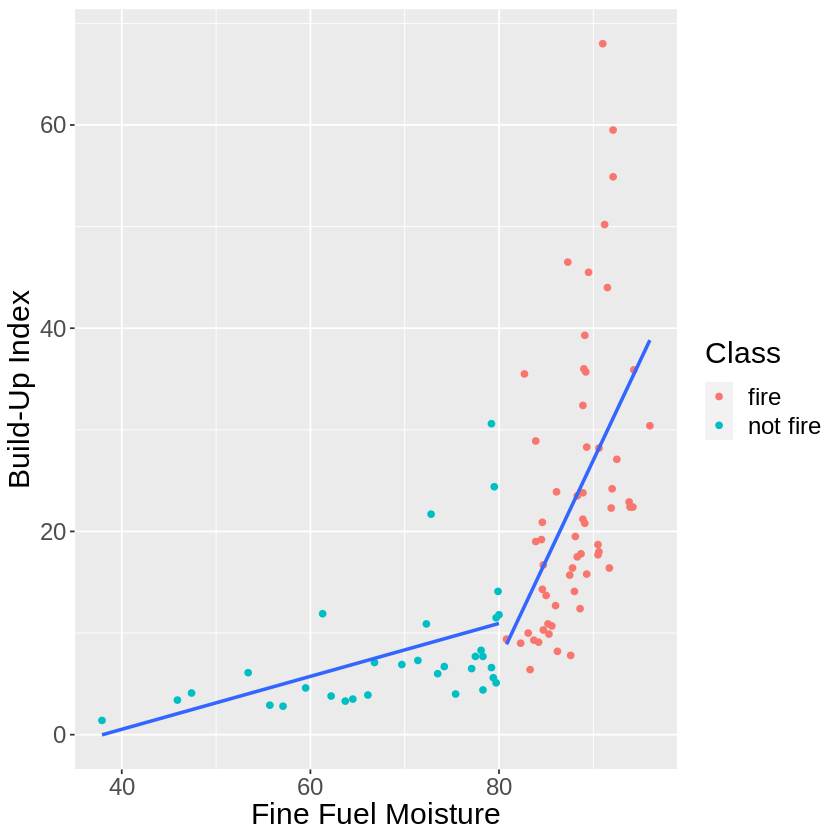

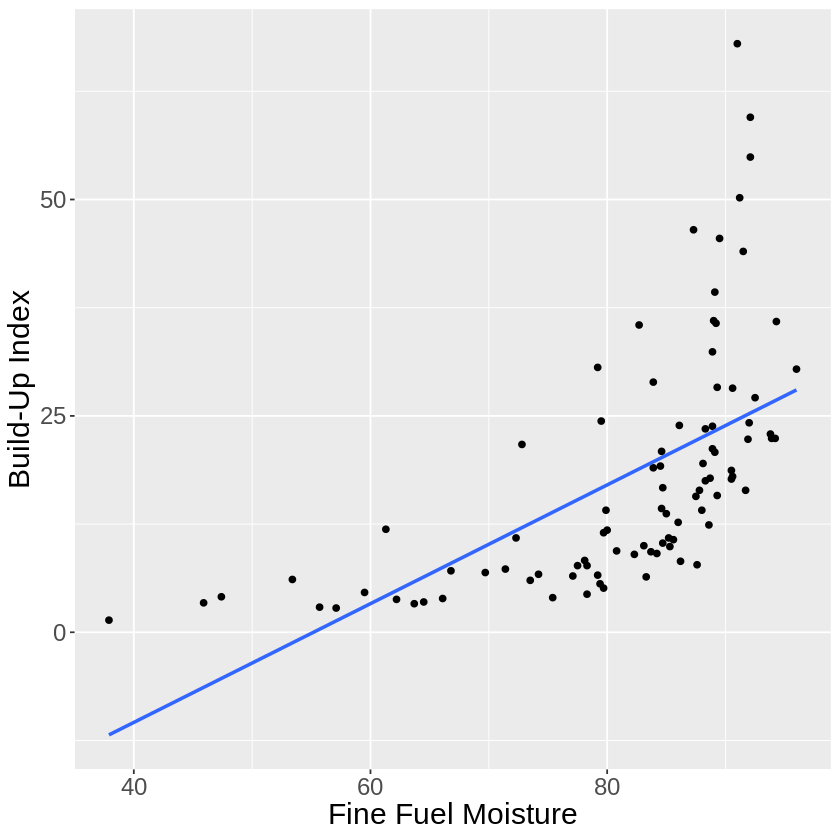

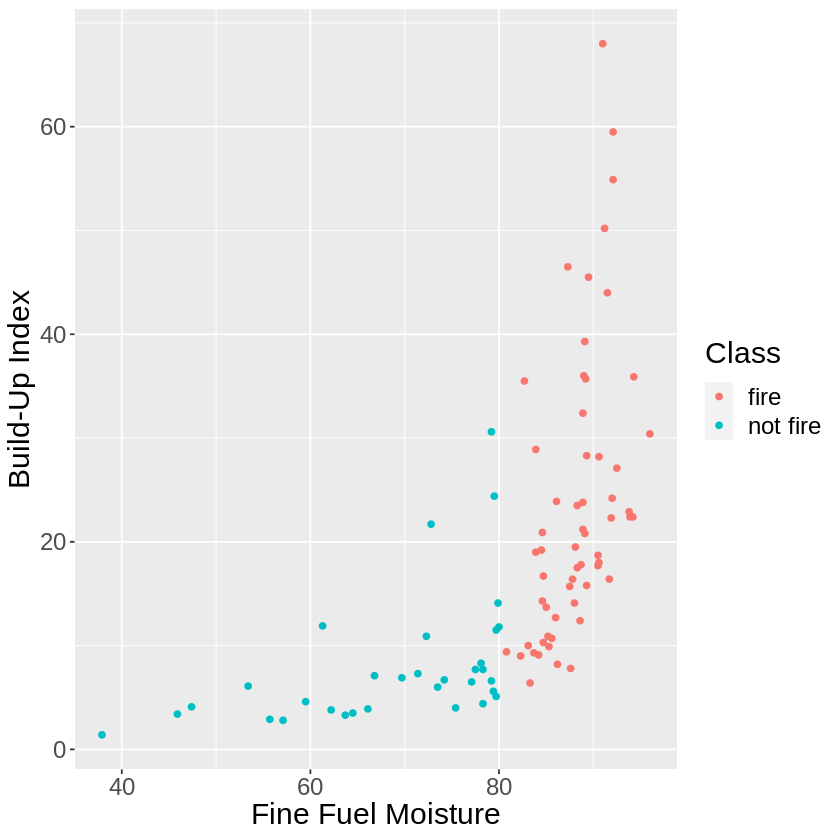

In [5]:
data_variables<-data_train%>%
    select(FFMC, BUI, Classes)
data_variables

data_plot_initial<-data_variables%>%
    ggplot(aes(x=FFMC, y=BUI, group=Classes))+
    geom_point(aes(color= Classes))+
           geom_smooth(method= lm, se=FALSE)+
    labs(x="Fine Fuel Moisture", y="Build-Up Index", color="Class")+
    theme(text=element_text(size=18))
          
data_plot_initial

data_plot_initial_3<-data_variables%>%
    ggplot(aes(x=FFMC, y=BUI, group=Classes))+
    geom_point(aes(color= Classes))+
    labs(x="Fine Fuel Moisture", y="Build-Up Index", color="Class")+
    theme(text=element_text(size=18))

data_plot_initial_2<-data_variables%>%
ggplot(aes(x=FFMC, y=BUI))+
    geom_point()+
   geom_smooth(method= lm, se=FALSE)+
labs(x="Fine Fuel Moisture", y="Build-Up Index", color="Class")+
    theme(text=element_text(size=18))

data_plot_initial_2
data_plot_initial_3